# Reading master data and EDA

Reading data for version 30/07/23

In [1]:
#Read some categories
import pandas as pd

#selected_categories=['All Electronics',"Computers","Cell Phones & Accessories","Cell Phones &amp; Accessories"]

#Read all folder names in master_data/reviews_master_parquet/reviews_master_parquet/

# needed to read the main_cat value, can be removed if the column is already in the dataset
import os
selected_categories = os.listdir('../master_data/reviews_master_parquet/reviews_master_parquet/') 
selected_categories.remove('._SUCCESS.crc')
selected_categories.remove('_SUCCESS')


df_all=[]

for category in selected_categories:
    print(f"Loading {category}")
    category_file = pd.read_parquet(f'../master_data/reviews_master_parquet/reviews_master_parquet/{category}/', engine="pyarrow")

    #Add category column merging Cell Phones & Accessories and Cell Phones &amp; Accessories
    if category == "Cell Phones &amp; Accessories":
        category_file['main_cat'] = "Cell Phones & Accessories"
    else:
        category_file['main_cat'] = category

    df_all.append(category_file)

df_all = pd.concat(df_all)

Loading main_cat=3D Printing
Loading main_cat=All Beauty
Loading main_cat=All Electronics
Loading main_cat=Amazon Devices
Loading main_cat=Amazon Fire TV
Loading main_cat=Amazon Home
Loading main_cat=Apple Products
Loading main_cat=Appliances
Loading main_cat=Arts, Crafts & Sewing
Loading main_cat=Arts, Crafts &amp; Sewing
Loading main_cat=Audible Audiobooks
Loading main_cat=Automotive
Loading main_cat=Baby
Loading main_cat=Books
Loading main_cat=Buy a Kindle
Loading main_cat=Camera & Photo
Loading main_cat=Camera &amp; Photo
Loading main_cat=Car Electronics
Loading main_cat=Cell Phones & Accessories
Loading main_cat=Cell Phones &amp; Accessories
Loading main_cat=Collectible Coins
Loading main_cat=Collectibles & Fine Art
Loading main_cat=Computers
Loading main_cat=Entertainment
Loading main_cat=Fine Art
Loading main_cat=Fire Phone
Loading main_cat=Gift Cards
Loading main_cat=GPS & Navigation
Loading main_cat=GPS &amp; Navigation
Loading main_cat=Grocery
Loading main_cat=Health & Person

In [10]:
df_all

,asin,reviewText,reviewerID,summary,vote,reviewTime,avg_overall,brand,price,rank,description,category,title,main_cat
0,B00IRH4E7I,"This might sound cheesy, but I'm really excite...",ACQV949CEYVDS,My very own 3D printed item!,3,2014-03-24,4.000,Janelle Wilson,NaN,"5,353,844 in Cell Phones & Accessories (",[Super Slim to protect with style and without ...,"[Cell Phones & Accessories, Cases, Holsters & ...","3D Printed Diamonds iPhone 5 Case, Red",main_cat=3D Printing
0,B0007OC0A2,I've purchased 3 tubes of this brand. The pro...,A13U4H83WY62Z5,Excellent Product that does what you buy it to...,4,2007-03-09,4.735,Sportslick,12.78,"80,359 in Beauty & Personal Care (",[],[],Sportslick Economy Tube,main_cat=All Beauty
1,B00APG79QM,Finally getting some of those needles pared do...,A13G9OAXNIZW4V,so it is great to not potentially harm my fur-...,6,2016-03-29,3.611,Sysrion,NaN,"534,952 in Beauty & Personal Care (",[<!--Allersoft 100 Percent Cotton Dust Mite an...,"[Home & Kitchen, Bedding]",Temporary Hair Chalk - Non-Toxic Rainbow Color...,main_cat=All Beauty
2,B0007OC0A2,"This is the best product, as far as I am conce...",A38L9JPKG0G1VY,Great Product - But Hard To Find,3,2012-03-13,4.735,Sportslick,12.78,"80,359 in Beauty & Personal Care (",[],[],Sportslick Economy Tube,main_cat=All Beauty
3,B00APG79QM,Love them!!! They are so much better quality t...,A1TJVXGKO9QIZI,Awesome!,6,2016-04-19,3.611,Sysrion,NaN,"534,952 in Beauty & Personal Care (",[<!--Allersoft 100 Percent Cotton Dust Mite an...,"[Home & Kitchen, Bedding]",Temporary Hair Chalk - Non-Toxic Rainbow Color...,main_cat=All Beauty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56552,B0053B5RGI,In the description of this product it was stat...,A3NE1XEDB117VB,Bad,8,2014-01-29,4.721,by\n \n Nintendo,NaN,"["">#544 in Video Games (See Top 100 in Video G...",[The Next Evolution in Pokemon comes to Ninten...,"[Video Games, Kids & Family, Nintendo 3DS, Gam...",Pokemon X,main_cat=Video Games
56553,B0053B5RGI,"What a shame. X/Y is not a horrible game, but ...",A24EUVUP8R67EI,"Mixed bag, could've been much better",3,2014-08-17,4.721,by\n \n Nintendo,NaN,"["">#544 in Video Games (See Top 100 in Video G...",[The Next Evolution in Pokemon comes to Ninten...,"[Video Games, Kids & Family, Nintendo 3DS, Gam...",Pokemon X,main_cat=Video Games
56554,B0053B5RGI,Pokemon in 3D for the first time since Pokemon...,A1Y33WDTKMHKN,Best Pokemon to Date!,3,2015-04-13,4.721,by\n \n Nintendo,NaN,"["">#544 in Video Games (See Top 100 in Video G...",[The Next Evolution in Pokemon comes to Ninten...,"[Video Games, Kids & Family, Nintendo 3DS, Gam...",Pokemon X,main_cat=Video Games
56555,B0053B5RGI,"I bought this as a gift, but has my own copy o...",AF4611PIMUCFT,Best Pokemon Series Yet!,4,2014-06-23,4.721,by\n \n Nintendo,NaN,"["">#544 in Video Games (See Top 100 in Video G...",[The Next Evolution in Pokemon comes to Ninten...,"[Video Games, Kids & Family, Nintendo 3DS, Gam...",Pokemon X,main_cat=Video Games


In [11]:
df_all.memory_usage(deep=True).sum()

11336193771

In [2]:
# Create a list of all the reviewTexts for asin = B000069JX9

selected_product = "B0053B5RGI"

reviews_by_product = df_all[df_all['asin'] == selected_product]

#astype(int) and replace "NonType" with 0

reviews_by_product["vote"].fillna(0, inplace=True)

reviews_by_product["vote"]=reviews_by_product["vote"].astype(int)

p_reviews_ordered=reviews_by_product.sort_values('vote', ascending=False)
p_reviews_ordered

C:\Users\GABRIEL\AppData\Local\Temp\ipykernel_37384\612108962.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_by_product["vote"].fillna(0, inplace=True)
C:\Users\GABRIEL\AppData\Local\Temp\ipykernel_37384\612108962.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_by_product["vote"]=reviews_by_product["vote"].astype(int)


,asin,reviewText,reviewerID,summary,vote,reviewTime,avg_overall,brand,price,rank,description,category,title,main_cat
56539,B0053B5RGI,I picked Pokemon Y when this generation was re...,A17O9AHKHK66AI,Back for Charizard X,16,2015-12-06,4.721,by\n \n Nintendo,NaN,"["">#544 in Video Games (See Top 100 in Video G...",[The Next Evolution in Pokemon comes to Ninten...,"[Video Games, Kids & Family, Nintendo 3DS, Gam...",Pokemon X,main_cat=Video Games
56536,B0053B5RGI,"Great game overall, I liked how Pokemon from o...",A1L8HB39PTIVRH,"Solid, but stripped down.",15,2014-04-07,4.721,by\n \n Nintendo,NaN,"["">#544 in Video Games (See Top 100 in Video G...",[The Next Evolution in Pokemon comes to Ninten...,"[Video Games, Kids & Family, Nintendo 3DS, Gam...",Pokemon X,main_cat=Video Games
56528,B0053B5RGI,This game is absolutely amazing! I have played...,A22JDCMAF35PQL,Absolutely Wonderful! A Must-Buy!,13,2013-12-08,4.721,by\n \n Nintendo,NaN,"["">#544 in Video Games (See Top 100 in Video G...",[The Next Evolution in Pokemon comes to Ninten...,"[Video Games, Kids & Family, Nintendo 3DS, Gam...",Pokemon X,main_cat=Video Games
56547,B0053B5RGI,It would seem pokemon is starting to really ge...,A3EFLQTQU9VYWT,Review,11,2016-02-15,4.721,by\n \n Nintendo,NaN,"["">#544 in Video Games (See Top 100 in Video G...",[The Next Evolution in Pokemon comes to Ninten...,"[Video Games, Kids & Family, Nintendo 3DS, Gam...",Pokemon X,main_cat=Video Games
56541,B0053B5RGI,Out of all the Pokemon games I own and have pl...,A2GA5V47G48176,Best Pokemon Game Ever!,10,2013-10-12,4.721,by\n \n Nintendo,NaN,"["">#544 in Video Games (See Top 100 in Video G...",[The Next Evolution in Pokemon comes to Ninten...,"[Video Games, Kids & Family, Nintendo 3DS, Gam...",Pokemon X,main_cat=Video Games
56530,B0053B5RGI,If you've played the last 5 generations of Pok...,A2WFTTZEHJ0AQA,Same game as always,9,2014-03-30,4.721,by\n \n Nintendo,NaN,"["">#544 in Video Games (See Top 100 in Video G...",[The Next Evolution in Pokemon comes to Ninten...,"[Video Games, Kids & Family, Nintendo 3DS, Gam...",Pokemon X,main_cat=Video Games
56531,B0053B5RGI,Although it took me a while to get this game.....,A2XXKUS5Y3PNOA,This game is over 9000!!,9,2015-02-21,4.721,by\n \n Nintendo,NaN,"["">#544 in Video Games (See Top 100 in Video G...",[The Next Evolution in Pokemon comes to Ninten...,"[Video Games, Kids & Family, Nintendo 3DS, Gam...",Pokemon X,main_cat=Video Games
56545,B0053B5RGI,Missing game cartridge.,A3SF38T8HYZE4I,One Star,9,2015-12-15,4.721,by\n \n Nintendo,NaN,"["">#544 in Video Games (See Top 100 in Video G...",[The Next Evolution in Pokemon comes to Ninten...,"[Video Games, Kids & Family, Nintendo 3DS, Gam...",Pokemon X,main_cat=Video Games
56552,B0053B5RGI,In the description of this product it was stat...,A3NE1XEDB117VB,Bad,8,2014-01-29,4.721,by\n \n Nintendo,NaN,"["">#544 in Video Games (See Top 100 in Video G...",[The Next Evolution in Pokemon comes to Ninten...,"[Video Games, Kids & Family, Nintendo 3DS, Gam...",Pokemon X,main_cat=Video Games
56546,B0053B5RGI,Everything about this game just screams polish...,A2K19OYDKB5F1Q,Probably the best in the series.,7,2013-10-17,4.721,by\n \n Nintendo,NaN,"["">#544 in Video Games (See Top 100 in Video G...",[The Next Evolution in Pokemon comes to Ninten...,"[Video Games, Kids & Family, Nintendo 3DS, Gam...",Pokemon X,main_cat=Video Games


In [13]:
#Get title of the selected product:
product_title=reviews_by_product.iloc[0]['title']
print(product_title)

Pokemon X


In [10]:
#Get description of the selected product:
product_description=reviews_by_product.iloc[0]['description']
print(product_description.astype(str)[0])

The Next Evolution in Pokemon comes to Nintendo 3DS.


In [3]:
reviews_list=p_reviews_ordered["reviewText"].to_list()
reviews_list

["I picked Pokemon Y when this generation was released, and I am still playing it. I'm here for Charizard X.\n\nI'm also here to replay the story and side quests. I'm a late middle aged parent, and I've played pokemon from the Gameboy Color on up. This particular series has so much to do, and the IV checker makes the game a dream for people who like to hatch eggs.",
 "Great game overall, I liked how Pokemon from older generations were available right from the beginning. However, I feel that it is stripped of many features included in older games, such as: any form of contests, a clearly antagonistic rival, significant post-elite 4 gameplay, difficulty, and a logical plot line. I miss the contests from Gen 3, because they added an element to experience after you've beaten the elite four. Also, the island that you unlock upon beating the elite 4, has only one type of challenge. The side characters are completely one-dimensional, and Lumiose City doesn't make sense to me.\n\nThat being sa

In [4]:
# Select from list max reviews to send to the model

max_number = 10 # just to test, can be changed

if len(reviews_list) > max_number:
    max_reviews = reviews_list[:max_number]
else:
    max_reviews = reviews_list

max_reviews

# Send it to the language model

["I picked Pokemon Y when this generation was released, and I am still playing it. I'm here for Charizard X.\n\nI'm also here to replay the story and side quests. I'm a late middle aged parent, and I've played pokemon from the Gameboy Color on up. This particular series has so much to do, and the IV checker makes the game a dream for people who like to hatch eggs.",
 "Great game overall, I liked how Pokemon from older generations were available right from the beginning. However, I feel that it is stripped of many features included in older games, such as: any form of contests, a clearly antagonistic rival, significant post-elite 4 gameplay, difficulty, and a logical plot line. I miss the contests from Gen 3, because they added an element to experience after you've beaten the elite four. Also, the island that you unlock upon beating the elite 4, has only one type of challenge. The side characters are completely one-dimensional, and Lumiose City doesn't make sense to me.\n\nThat being sa

Reading data, version 29/07/23

In [48]:
import pandas as pd

selected_categories=['All Electronics',"Computers","Cell Phones & Accessories","Cell Phones &amp; Accessories"]

df_all=[]

for category in selected_categories:

    category_file = pd.read_parquet(f'../master_data/parquet/parquet/main_cat={category}/', engine="pyarrow")

    #Add category column merging Cell Phones & Accessories and Cell Phones &amp; Accessories
    if category == "Cell Phones &amp; Accessories":
        category_file['main_cat'] = "Cell Phones & Accessories"
    else:
        category_file['main_cat'] = category

    df_all.append(category_file)

df_all = pd.concat(df_all)


In [39]:
df_all.head()

,asin,overall,reviewText,reviewerID,summary,verified,vote,reviewTime,brand,price,rank,description,category,title
0,B000069JX9,5.0,This controller works perfectly to my experien...,A11Q6CX5FY5HE6,"A controller without problems, period.",false,None,2004-06-06 00:00:00,Microsoft,,"["">#110 in Electronics > Accessories & Supplie...",[],"[Video Games, Mac, Accessories, Controllers, G...",Microsoft SideWinder Game Pad USB
1,B00BZFGNPU,5.0,Received my case and it fits perfectly. The ki...,A31N5BEI8WO2U1,Perfect fit!,true,None,2013-09-04 00:00:00,EMPIRE,,"["">#680,526 in Cell Phones & Accessories (See ...",[],"[Cell Phones & Accessories, Cases, Holsters & ...",MPERO IMPACT X Series Kickstand Case for Motor...
2,B000069JX9,3.0,I bought this controller at a wal mart about a...,A112X1OMQPR7SN,Absolutely what I expected.,false,None,2006-06-24 00:00:00,Microsoft,,"["">#110 in Electronics > Accessories & Supplie...",[],"[Video Games, Mac, Accessories, Controllers, G...",Microsoft SideWinder Game Pad USB
3,B00BZFGNPU,5.0,I ordered this case for my Mom since her last ...,ADNPA1CQTBJIL,Awesome Case!,true,None,2014-06-16 00:00:00,EMPIRE,,"["">#680,526 in Cell Phones & Accessories (See ...",[],"[Cell Phones & Accessories, Cases, Holsters & ...",MPERO IMPACT X Series Kickstand Case for Motor...
4,B000069JX9,5.0,I use this gamepad as an inexpensive and conve...,A2J0ZZPEN3ZEC5,"nice, inexpensive peripheral",false,3,2002-07-23 00:00:00,Microsoft,,"["">#110 in Electronics > Accessories & Supplie...",[],"[Video Games, Mac, Accessories, Controllers, G...",Microsoft SideWinder Game Pad USB


In [55]:
#show all unique categories
df_all['main_cat'].unique().sort()

In [56]:
#show all different brands sorted alphabetically
sorted_brands=df_all['brand'].unique()
sorted_brands.sort()
sorted_brands

array(['', '#1 Consumers Choice', '%3FInnove', ..., 'zhuzhu ai luo',
       'zizo', 'zonman'], dtype=object)

In [61]:
#show all unique products sorted by title alphabetically
df_all['asin'].unique().shape




(48122,)

In [70]:
# Add new column with asin and product title

df_all["asin_title"] = "PID: "+ df_all["asin"] + " Title: " + df_all["title"]

In [71]:
df_all.head()

,asin,overall,reviewText,reviewerID,summary,verified,vote,reviewTime,brand,price,rank,description,category,title,main_cat,asin_title
0,B000069JX9,5.0,This controller works perfectly to my experien...,A11Q6CX5FY5HE6,"A controller without problems, period.",false,None,2004-06-06 00:00:00,Microsoft,,"["">#110 in Electronics > Accessories & Supplie...",[],"[Video Games, Mac, Accessories, Controllers, G...",Microsoft SideWinder Game Pad USB,All Electronics,PID: B000069JX9 Title: Microsoft SideWinder Ga...
1,B00BZFGNPU,5.0,Received my case and it fits perfectly. The ki...,A31N5BEI8WO2U1,Perfect fit!,true,None,2013-09-04 00:00:00,EMPIRE,,"["">#680,526 in Cell Phones & Accessories (See ...",[],"[Cell Phones & Accessories, Cases, Holsters & ...",MPERO IMPACT X Series Kickstand Case for Motor...,All Electronics,PID: B00BZFGNPU Title: MPERO IMPACT X Series K...
2,B000069JX9,3.0,I bought this controller at a wal mart about a...,A112X1OMQPR7SN,Absolutely what I expected.,false,None,2006-06-24 00:00:00,Microsoft,,"["">#110 in Electronics > Accessories & Supplie...",[],"[Video Games, Mac, Accessories, Controllers, G...",Microsoft SideWinder Game Pad USB,All Electronics,PID: B000069JX9 Title: Microsoft SideWinder Ga...
3,B00BZFGNPU,5.0,I ordered this case for my Mom since her last ...,ADNPA1CQTBJIL,Awesome Case!,true,None,2014-06-16 00:00:00,EMPIRE,,"["">#680,526 in Cell Phones & Accessories (See ...",[],"[Cell Phones & Accessories, Cases, Holsters & ...",MPERO IMPACT X Series Kickstand Case for Motor...,All Electronics,PID: B00BZFGNPU Title: MPERO IMPACT X Series K...
4,B000069JX9,5.0,I use this gamepad as an inexpensive and conve...,A2J0ZZPEN3ZEC5,"nice, inexpensive peripheral",false,3,2002-07-23 00:00:00,Microsoft,,"["">#110 in Electronics > Accessories & Supplie...",[],"[Video Games, Mac, Accessories, Controllers, G...",Microsoft SideWinder Game Pad USB,All Electronics,PID: B000069JX9 Title: Microsoft SideWinder Ga...


In [91]:
# Create a list of all the reviewTexts for asin = B000069JX9

selected_product = "B000069JX9"

reviews_by_product = df_all[df_all['asin'] == selected_product]

#astype(int) and replace "NonType" with 0

reviews_by_product["vote"].fillna(0, inplace=True)

reviews_by_product["vote"]=reviews_by_product["vote"].astype(int)

p_reviews_ordered=reviews_by_product.sort_values('vote', ascending=False)
p_reviews_ordered


#Then select a specified number of reviews, probably the most voted ones

C:\Users\GABRIEL\AppData\Local\Temp\ipykernel_26360\986463544.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_by_product["vote"].fillna(0, inplace=True)
C:\Users\GABRIEL\AppData\Local\Temp\ipykernel_26360\986463544.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_by_product["vote"]=reviews_by_product["vote"].astype(int)


,asin,overall,reviewText,reviewerID,summary,verified,vote,reviewTime,brand,price,rank,description,category,title,main_cat,asin_title
12,B000069JX9,5.0,"Many people don't like Microsoft, and there ar...",A1KQBK7ZTYWGZV,Nice and simple,false,27,2002-12-15 00:00:00,Microsoft,,"["">#110 in Electronics > Accessories & Supplie...",[],"[Video Games, Mac, Accessories, Controllers, G...",Microsoft SideWinder Game Pad USB,All Electronics,PID: B000069JX9 Title: Microsoft SideWinder Ga...
6,B000069JX9,5.0,"The Sidewinder USB is comfortable, programmabl...",A1TT51FSXE1V6E,Top-notch control with plenty of flexibility,false,8,2003-03-14 00:00:00,Microsoft,,"["">#110 in Electronics > Accessories & Supplie...",[],"[Video Games, Mac, Accessories, Controllers, G...",Microsoft SideWinder Game Pad USB,All Electronics,PID: B000069JX9 Title: Microsoft SideWinder Ga...
20,B000069JX9,4.0,This is about the most perfect pad out there i...,A2WXFNG33Y2TCB,Pretty Tight,false,7,2002-08-02 00:00:00,Microsoft,,"["">#110 in Electronics > Accessories & Supplie...",[],"[Video Games, Mac, Accessories, Controllers, G...",Microsoft SideWinder Game Pad USB,All Electronics,PID: B000069JX9 Title: Microsoft SideWinder Ga...
16,B000069JX9,5.0,"This is a really great gamepad, for all the re...",ADU0M5CDNLEUT,Fantastic! Where'd it go?,false,6,2004-01-04 00:00:00,Microsoft,,"["">#110 in Electronics > Accessories & Supplie...",[],"[Video Games, Mac, Accessories, Controllers, G...",Microsoft SideWinder Game Pad USB,All Electronics,PID: B000069JX9 Title: Microsoft SideWinder Ga...
18,B000069JX9,4.0,The major selling points:\n1. There are lots o...,A3S8EKK6MRBLN6,Solid Gamepad,true,5,2003-07-02 00:00:00,Microsoft,,"["">#110 in Electronics > Accessories & Supplie...",[],"[Video Games, Mac, Accessories, Controllers, G...",Microsoft SideWinder Game Pad USB,All Electronics,PID: B000069JX9 Title: Microsoft SideWinder Ga...
28,B000069JX9,3.0,This pad has a nice feel and molds to your han...,AEQXKSJZE04W,"Nice feel, mediocre play control",false,5,2002-09-22 00:00:00,Microsoft,,"["">#110 in Electronics > Accessories & Supplie...",[],"[Video Games, Mac, Accessories, Controllers, G...",Microsoft SideWinder Game Pad USB,All Electronics,PID: B000069JX9 Title: Microsoft SideWinder Ga...
14,B000069JX9,4.0,one of the easiest controller to configure. th...,AEFBL9Q079UR3,one of the best,false,4,2003-02-21 00:00:00,Microsoft,,"["">#110 in Electronics > Accessories & Supplie...",[],"[Video Games, Mac, Accessories, Controllers, G...",Microsoft SideWinder Game Pad USB,All Electronics,PID: B000069JX9 Title: Microsoft SideWinder Ga...
4,B000069JX9,5.0,I use this gamepad as an inexpensive and conve...,A2J0ZZPEN3ZEC5,"nice, inexpensive peripheral",false,3,2002-07-23 00:00:00,Microsoft,,"["">#110 in Electronics > Accessories & Supplie...",[],"[Video Games, Mac, Accessories, Controllers, G...",Microsoft SideWinder Game Pad USB,All Electronics,PID: B000069JX9 Title: Microsoft SideWinder Ga...
30,B000069JX9,1.0,The sidewinder controller just so happenes to ...,A3PDZNINGCJC2,Has a major problem,false,3,2004-08-30 00:00:00,Microsoft,,"["">#110 in Electronics > Accessories & Supplie...",[],"[Video Games, Mac, Accessories, Controllers, G...",Microsoft SideWinder Game Pad USB,All Electronics,PID: B000069JX9 Title: Microsoft SideWinder Ga...
8,B000069JX9,4.0,I'll tell you what it can do! Through all of ...,ACAWLJ657YB0B,What can the SideWinder do for you?,false,2,2003-01-03 00:00:00,Microsoft,,"["">#110 in Electronics > Accessories & Supplie...",[],"[Video Games, Mac, Accessories, Controllers, G...",Microsoft SideWinder Game Pad USB,All Electronics,PID: B000069JX9 Title: Microsoft SideWinder Ga...


In [96]:
reviews_list=p_reviews_ordered["reviewText"].to_list()
reviews_list

['Many people don\'t like Microsoft, and there are many reasons why, but sometimes they put out a good product that makes people feel more positive about them. The Sidewinder is one of them. I needed a good controller for Grand Theft Auto 3 because playing on the keyboard was taking all the fun out of it.\nAfter comparison shopping at local electronics stores, I found that the Sidewinder was one of the best controllers around for these reasons:\n- Sturdy and solid. Won\'t break when you twist it and turn it.\n- Very comfortable to hold because of its rounded design and light weight.\n- Easy to setup. As soon as I plugged the USB into my computer, Windows automatically recognized it without any problems or need to install any drivers.\n- Many games support it right off the bat. The "joystick" option appeared in all of the games that I have on the PC - GTA3, Wolfenstein, IL-2 Shturmovik, etc.\n- The buttons are well placed and easy to differentiate, you won\'t confuse "shoot" with "jump"

In [99]:
# Select from list max reviews to send to the model

max_number = 10 # just to test, can be changed

if len(reviews_list) > max_number:
    max_reviews = reviews_list[:max_number]
else:
    max_reviews = reviews_list

max_reviews

# Send it to the language model













['Many people don\'t like Microsoft, and there are many reasons why, but sometimes they put out a good product that makes people feel more positive about them. The Sidewinder is one of them. I needed a good controller for Grand Theft Auto 3 because playing on the keyboard was taking all the fun out of it.\nAfter comparison shopping at local electronics stores, I found that the Sidewinder was one of the best controllers around for these reasons:\n- Sturdy and solid. Won\'t break when you twist it and turn it.\n- Very comfortable to hold because of its rounded design and light weight.\n- Easy to setup. As soon as I plugged the USB into my computer, Windows automatically recognized it without any problems or need to install any drivers.\n- Many games support it right off the bat. The "joystick" option appeared in all of the games that I have on the PC - GTA3, Wolfenstein, IL-2 Shturmovik, etc.\n- The buttons are well placed and easy to differentiate, you won\'t confuse "shoot" with "jump"

<Axes: >

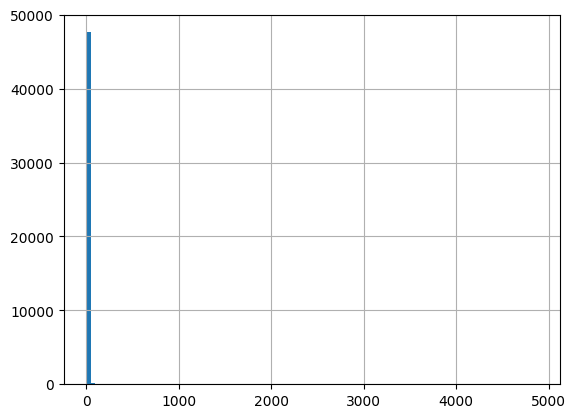

In [102]:
#Group by asin and get the count of rows in a single column
df_all.groupby('asin').count()["overall"].hist(bins=100)


# Time charts

In [2]:
#Read some categories
import pandas as pd

#selected_categories=['All Electronics',"Computers","Cell Phones & Accessories","Cell Phones &amp; Accessories"]

#Read all folder names in master_data/reviews_master_parquet/reviews_master_parquet/

# needed to read the main_cat value, can be removed if the column is already in the dataset
import os
selected_categories = os.listdir('../master_data/reviews_master_parquet/reviews_master_parquet/') 
selected_categories.remove('._SUCCESS.crc')
selected_categories.remove('_SUCCESS')


df_all=[]

for category in selected_categories:
    print(f"Loading {category}")
    category_file = pd.read_parquet(f'../master_data/reviews_master_parquet/reviews_master_parquet/{category}/', engine="pyarrow")

    #Add category column merging Cell Phones & Accessories and Cell Phones &amp; Accessories
    if category == "Cell Phones &amp; Accessories":
        category_file['main_cat'] = "Cell Phones & Accessories"
    else:
        category_file['main_cat'] = category

    df_all.append(category_file)

df_all = pd.concat(df_all)

Loading main_cat=3D Printing
Loading main_cat=All Beauty
Loading main_cat=All Electronics
Loading main_cat=Amazon Devices
Loading main_cat=Amazon Fire TV
Loading main_cat=Amazon Home
Loading main_cat=Apple Products
Loading main_cat=Appliances
Loading main_cat=Arts, Crafts & Sewing
Loading main_cat=Arts, Crafts &amp; Sewing
Loading main_cat=Audible Audiobooks
Loading main_cat=Automotive
Loading main_cat=Baby
Loading main_cat=Books
Loading main_cat=Buy a Kindle
Loading main_cat=Camera & Photo
Loading main_cat=Camera &amp; Photo
Loading main_cat=Car Electronics
Loading main_cat=Cell Phones & Accessories
Loading main_cat=Cell Phones &amp; Accessories
Loading main_cat=Collectible Coins
Loading main_cat=Collectibles & Fine Art
Loading main_cat=Computers
Loading main_cat=Entertainment
Loading main_cat=Fine Art
Loading main_cat=Fire Phone
Loading main_cat=Gift Cards
Loading main_cat=GPS & Navigation
Loading main_cat=GPS &amp; Navigation
Loading main_cat=Grocery
Loading main_cat=Health & Person

In [5]:
# Filter by product

product="B0053B5RGI"

df_product = df_all[df_all['asin']==product]

C:\Users\GABRIEL\AppData\Local\Temp\ipykernel_3588\2667823929.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_product['reviewTime'] = pd.to_datetime(df_product['reviewTime'])
C:\Users\GABRIEL\AppData\Local\Temp\ipykernel_3588\2667823929.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_product['reviewYear'] = df_product['reviewTime'].dt.year
C:\Users\GABRIEL\AppData\Local\Temp\ipykernel_3588\2667823929.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

<Axes: title={'center': 'Selected Product Review Activity by Year'}, xlabel='reviewYear'>

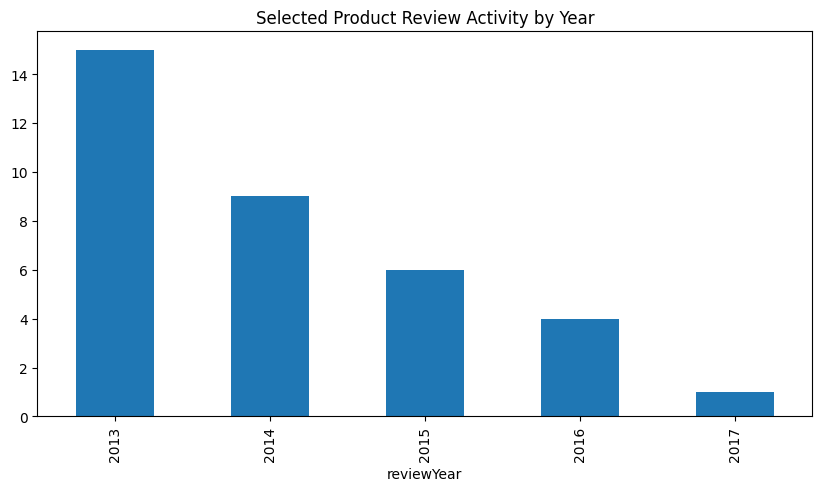

In [8]:
#Show selected product review activity by year

# Split review date reviewTime into year, month, day

df_product['reviewTime'] = pd.to_datetime(df_product['reviewTime'])
df_product['reviewYear'] = df_product['reviewTime'].dt.year
df_product['reviewMonth'] = df_product['reviewTime'].dt.month
df_product['reviewDay'] = df_product['reviewTime'].dt.day

# Show selected product review activity by year
df_product.groupby('reviewYear').count()['reviewerID'].plot(kind='bar', figsize=(10,5), title='Selected Product Review Activity by Year')


C:\Users\GABRIEL\AppData\Local\Temp\ipykernel_3588\3037549427.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brand['reviewTime'] = pd.to_datetime(df_brand['reviewTime'])
C:\Users\GABRIEL\AppData\Local\Temp\ipykernel_3588\3037549427.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brand['year'] = df_brand['reviewTime'].dt.year
C:\Users\GABRIEL\AppData\Local\Temp\ipykernel_3588\3037549427.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

<Axes: title={'center': 'HP'}, xlabel='year'>

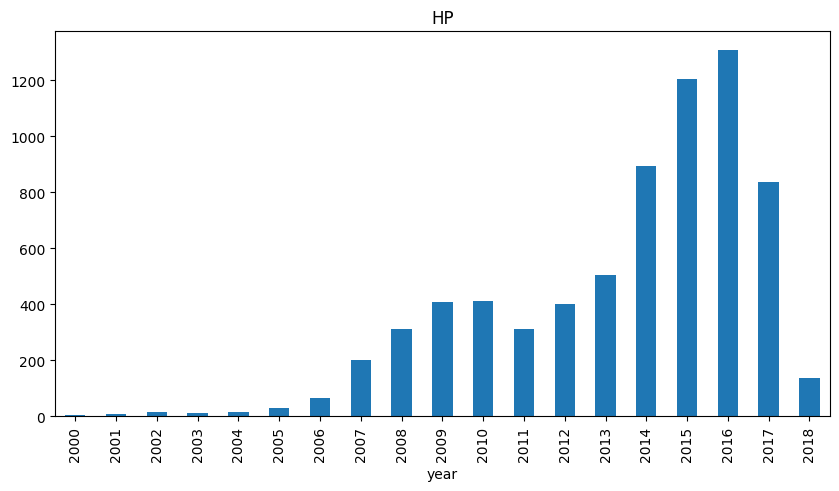

In [18]:
#Show selected brand review activity by year

brand="HP"

df_brand = df_all[df_all['brand']==brand]

# Split review date reviewTime into year, month, day

df_brand['reviewTime'] = pd.to_datetime(df_brand['reviewTime'])
df_brand['year'] = df_brand['reviewTime'].dt.year
df_brand['month'] = df_brand['reviewTime'].dt.month
df_brand['day'] = df_brand['reviewTime'].dt.day

# Group by year and count number of reviews and plot

df_brand_year = df_brand.groupby(['year']).count()

df_brand_year['reviewerID'].plot(kind='bar', figsize=(10,5), title=brand)




<Axes: title={'center': 'Main categories for HP'}, xlabel='main_cat'>

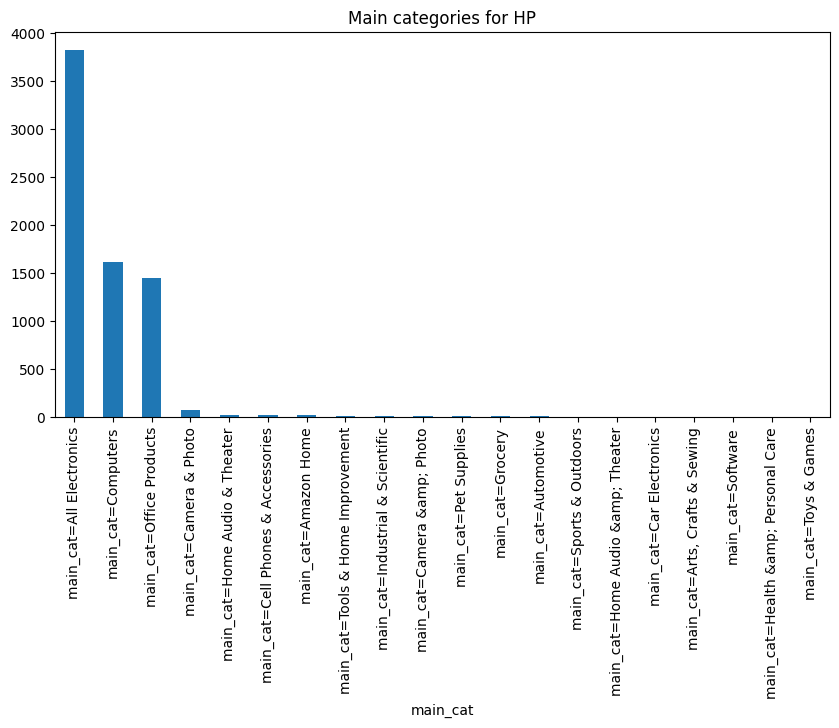

In [19]:
#Show most common categories (main_cat) for the selected brand

brand="HP"

df_brand = df_all[df_all['brand']==brand]

df_brand['main_cat'].value_counts().plot(kind='bar', figsize=(10,5), title="Main categories for "+brand)